# Trabalho Prático 2

- O tabalho pode ser feito em duplas ou individualmente
- A realização da entrega deverá ser feita via Teams (tarefa adicionada à equipe), atente-se ao prazo de entrega. Não será possível realizar a entrega após o prazo previsto.
- Apenas esse arquivo (.ipynb) com a resolução deverá ser entregue (entregas em formato .zip serão penalizados)
- Caso tenha sido feito em dupla, apenas 1 aluno deve realizar a entrega, com os nomes dos dois participantes

#### Preencha com suas informações
Matheus Henrique Braga Julidori GES 66
Arthur Ferreira Silva GEC 1762

## Criando o Antescendent (Entrada de dados)

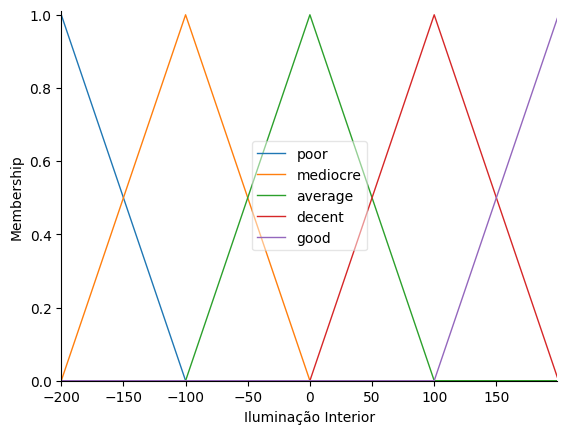

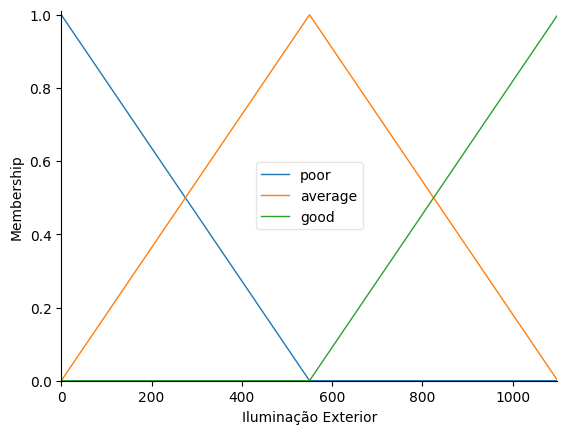

In [18]:
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control


universoInterior = np.arange(-200, 200)
universoExterior = np.arange(0, 1100)

interior = control.Antecedent(universe = universoInterior, label = "Iluminação Interior")
exterior = control.Antecedent(universe = universoExterior, label = "Iluminação Exterior")


interior["poor"] = fuzzy.trimf(interior.universe, [-200, -200, -100])
interior["mediocre"] = fuzzy.trimf(interior.universe, [-200, -100, 0])
interior["average"] = fuzzy.trimf(interior.universe, [-100, 0, 100])
interior["decent"] = fuzzy.trimf(interior.universe, [ 0, 100, 200])
interior["good"] = fuzzy.trimf(interior.universe, [ 100, 200, 200])

exterior["poor"] = fuzzy.trimf(exterior.universe, [0, 0, 550])
exterior["average"] = fuzzy.trimf(exterior.universe, [0, 550, 1100])
exterior["good"] = fuzzy.trimf(exterior.universe, [550,1100, 1100])

interior.view()
exterior.view()

## Criando consequent (Saída de dados)

/home/matheusjulidori/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


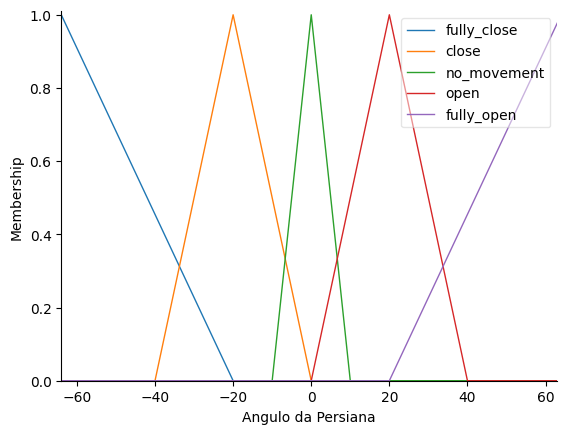

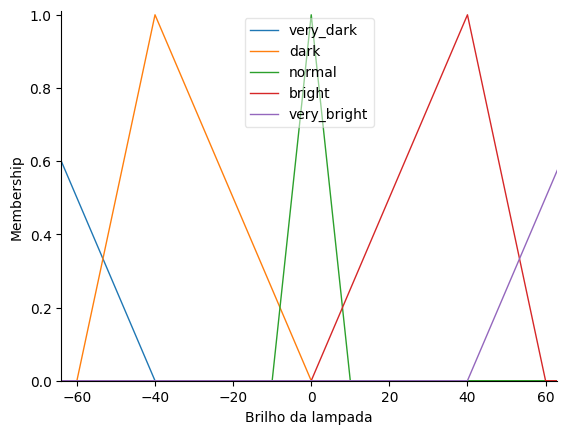

In [20]:
unversoPersiana = np.arange(-64, 64)

persiana = control.Consequent(universe = unversoPersiana, label = "Angulo da Persiana")

persiana["fully_close"] = fuzzy.trimf(persiana.universe, [-64, -64, -20])
persiana["close"] = fuzzy.trimf(persiana.universe, [-40, -20, 0])
persiana["no_movement"] = fuzzy.trimf(persiana.universe, [-10, 0, 10])
persiana["open"] = fuzzy.trimf(persiana.universe, [0, 20, 40])
persiana["fully_open"] = fuzzy.trimf(persiana.universe, [20, 64, 64])

unversoLampada = np.arange(-80, 80)

lampada = control.Consequent(universe = unversoPersiana, label = "Brilho da lampada")

lampada["very_dark"] = fuzzy.trimf(lampada.universe, [-80, -80, -40])
lampada["dark"] = fuzzy.trimf(lampada.universe, [-60, -40, 0])
lampada["normal"] = fuzzy.trimf(lampada.universe, [-10, 0, 10])
lampada["bright"] = fuzzy.trimf(lampada.universe, [0, 40, 60])
lampada["very_bright"] = fuzzy.trimf(lampada.universe, [40, 80, 80])

persiana.view()
lampada.view()

## Conjunto de Regras

In [21]:
persiana_regra1 = control.Rule(interior["poor"] & exterior["poor"], persiana["fully_open"])
persiana_regra2 = control.Rule(interior["poor"] & exterior["average"], persiana["fully_open"])
persiana_regra3 = control.Rule(interior["poor"] & exterior["good"], persiana["open"])
persiana_regra4 = control.Rule(interior["mediocre"] & exterior["poor"], persiana["fully_open"])
persiana_regra5 = control.Rule(interior["mediocre"] & exterior["average"], persiana["open"])
persiana_regra6 = control.Rule(interior["mediocre"] & exterior["good"], persiana["open"])
persiana_regra7 = control.Rule(interior["average"], persiana["no_movement"])
persiana_regra8 = control.Rule(interior["decent"] & exterior["poor"], persiana["no_movement"])
persiana_regra9 = control.Rule(interior["decent"] & exterior["average"], persiana["close"])
persiana_regra10 = control.Rule(interior["decent"] & exterior["good"], persiana["fully_close"])
persiana_regra11 = control.Rule(interior["good"] & exterior["poor"], persiana["close"])
persiana_regra12 = control.Rule(interior["good"] & exterior["average"], persiana["fully_close"])
persiana_regra13 = control.Rule(interior["good"] & exterior["good"], persiana["fully_close"])

lampada_regra1 = control.Rule(interior["poor"] & exterior["poor"], lampada["very_bright"])
lampada_regra2 = control.Rule(interior["poor"] & exterior["average"], lampada["very_bright"])
lampada_regra3 = control.Rule(interior["poor"] & exterior["good"], lampada["bright"])
lampada_regra4 = control.Rule(interior["mediocre"] & exterior["poor"], lampada["very_bright"])
lampada_regra5 = control.Rule(interior["mediocre"] & exterior["average"], lampada["bright"])
lampada_regra6 = control.Rule(interior["mediocre"] & exterior["good"], lampada["bright"])
lampada_regra7 = control.Rule(interior["average"], lampada["normal"])
lampada_regra8 = control.Rule(interior["decent"] & exterior["poor"], lampada["normal"])
lampada_regra9 = control.Rule(interior["decent"] & exterior["average"], lampada["dark"])
lampada_regra10 = control.Rule(interior["decent"] & exterior["good"], lampada["very_dark"])
lampada_regra11 = control.Rule(interior["good"] & exterior["poor"], lampada["dark"])
lampada_regra12 = control.Rule(interior["good"] & exterior["average"], lampada["very_dark"])
lampada_regra13 = control.Rule(interior["good"] & exterior["good"], lampada["very_dark"])

lampada_controle = control.ControlSystem([lampada_regra1, lampada_regra2, lampada_regra3, lampada_regra4, lampada_regra5, lampada_regra6, lampada_regra7, lampada_regra8, lampada_regra9, lampada_regra10, lampada_regra11, lampada_regra12, lampada_regra13])
persiana_controle = control.ControlSystem([persiana_regra1, persiana_regra2, persiana_regra3, persiana_regra4, persiana_regra5, persiana_regra6, persiana_regra7, persiana_regra8, persiana_regra9, persiana_regra10, persiana_regra11, persiana_regra12, persiana_regra13])

## Criando o sistema

Resultado 'desfuzzificado' persiana exemplo 1: -5.568093385214008
Resultado 'desfuzzificado' lampada exemplo 1: -11.417508417508417
Resultado 'desfuzzificado' persiana exemplo 2: 18.699034663399598
Resultado 'desfuzzificado' lampada exemplo 2: 31.486692222656675


/home/matheusjulidori/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


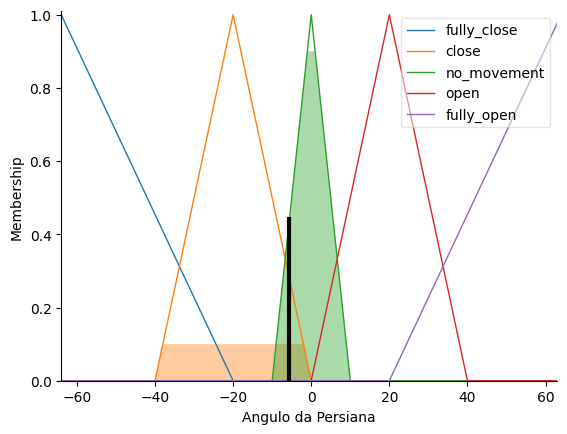

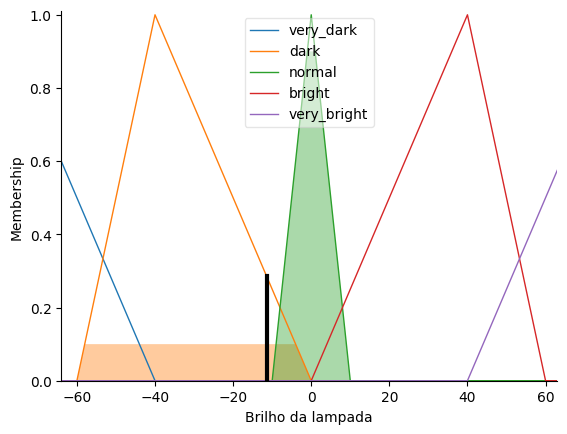

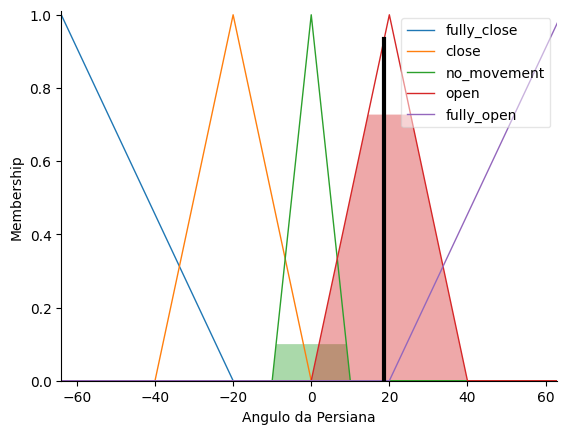

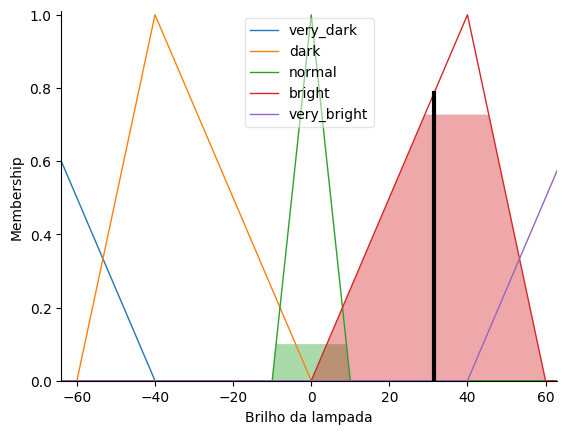

In [22]:
sistema_persiana = control.ControlSystemSimulation(persiana_controle)
sistema_lampada = control.ControlSystemSimulation(lampada_controle)

sistema_persiana.input["Iluminação Interior"] = 110
sistema_persiana.input["Iluminação Exterior"] = 0
sistema_persiana.compute()

sistema_lampada.input["Iluminação Interior"] = 110
sistema_lampada.input["Iluminação Exterior"] = 0
sistema_lampada.compute()

print(f"Resultado 'desfuzzificado' persiana exemplo 1: {sistema_persiana.output['Angulo da Persiana']}")
print(f"Resultado 'desfuzzificado' lampada exemplo 1: {sistema_lampada.output['Brilho da lampada']}")

persiana.view(sim=sistema_persiana)
lampada.view(sim=sistema_lampada)


# Exemplo 2

sistema_persiana.input["Iluminação Interior"] = -90
sistema_persiana.input["Iluminação Exterior"] = 700
sistema_persiana.compute()

sistema_lampada.input["Iluminação Interior"] = -90
sistema_lampada.input["Iluminação Exterior"] = 700
sistema_lampada.compute()

print(f"Resultado 'desfuzzificado' persiana exemplo 2: {sistema_persiana.output['Angulo da Persiana']}")
print(f"Resultado 'desfuzzificado' lampada exemplo 2: {sistema_lampada.output['Brilho da lampada']}")

persiana.view(sim=sistema_persiana)
lampada.view(sim=sistema_lampada)